## **Breast Cancer data**  
  
- PCA가 가장 널리 사용되는 분야 중 하나는 고차원 데이터 셋의 시각화  
- 이 데이터와 같이 특성이 많은 데이터들은 시각화로 데이터의 특성을 살펴보는 것이 불가능  
- iris 데이터에서 해보았듯이 산점도 행렬로 볼 수 있겠으나, 이 데이터에서는 30개의 특성에 대해 산점도 행렬을 그려도 특성을 보기는 어렵다  
- 2차원에 표현해 볼 수 있는 한가지 방법은 두 클래스(악성, 양성)에 대해 각 특성별로 히스토그램을 그려보는 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
breast = datasets.load_breast_cancer()

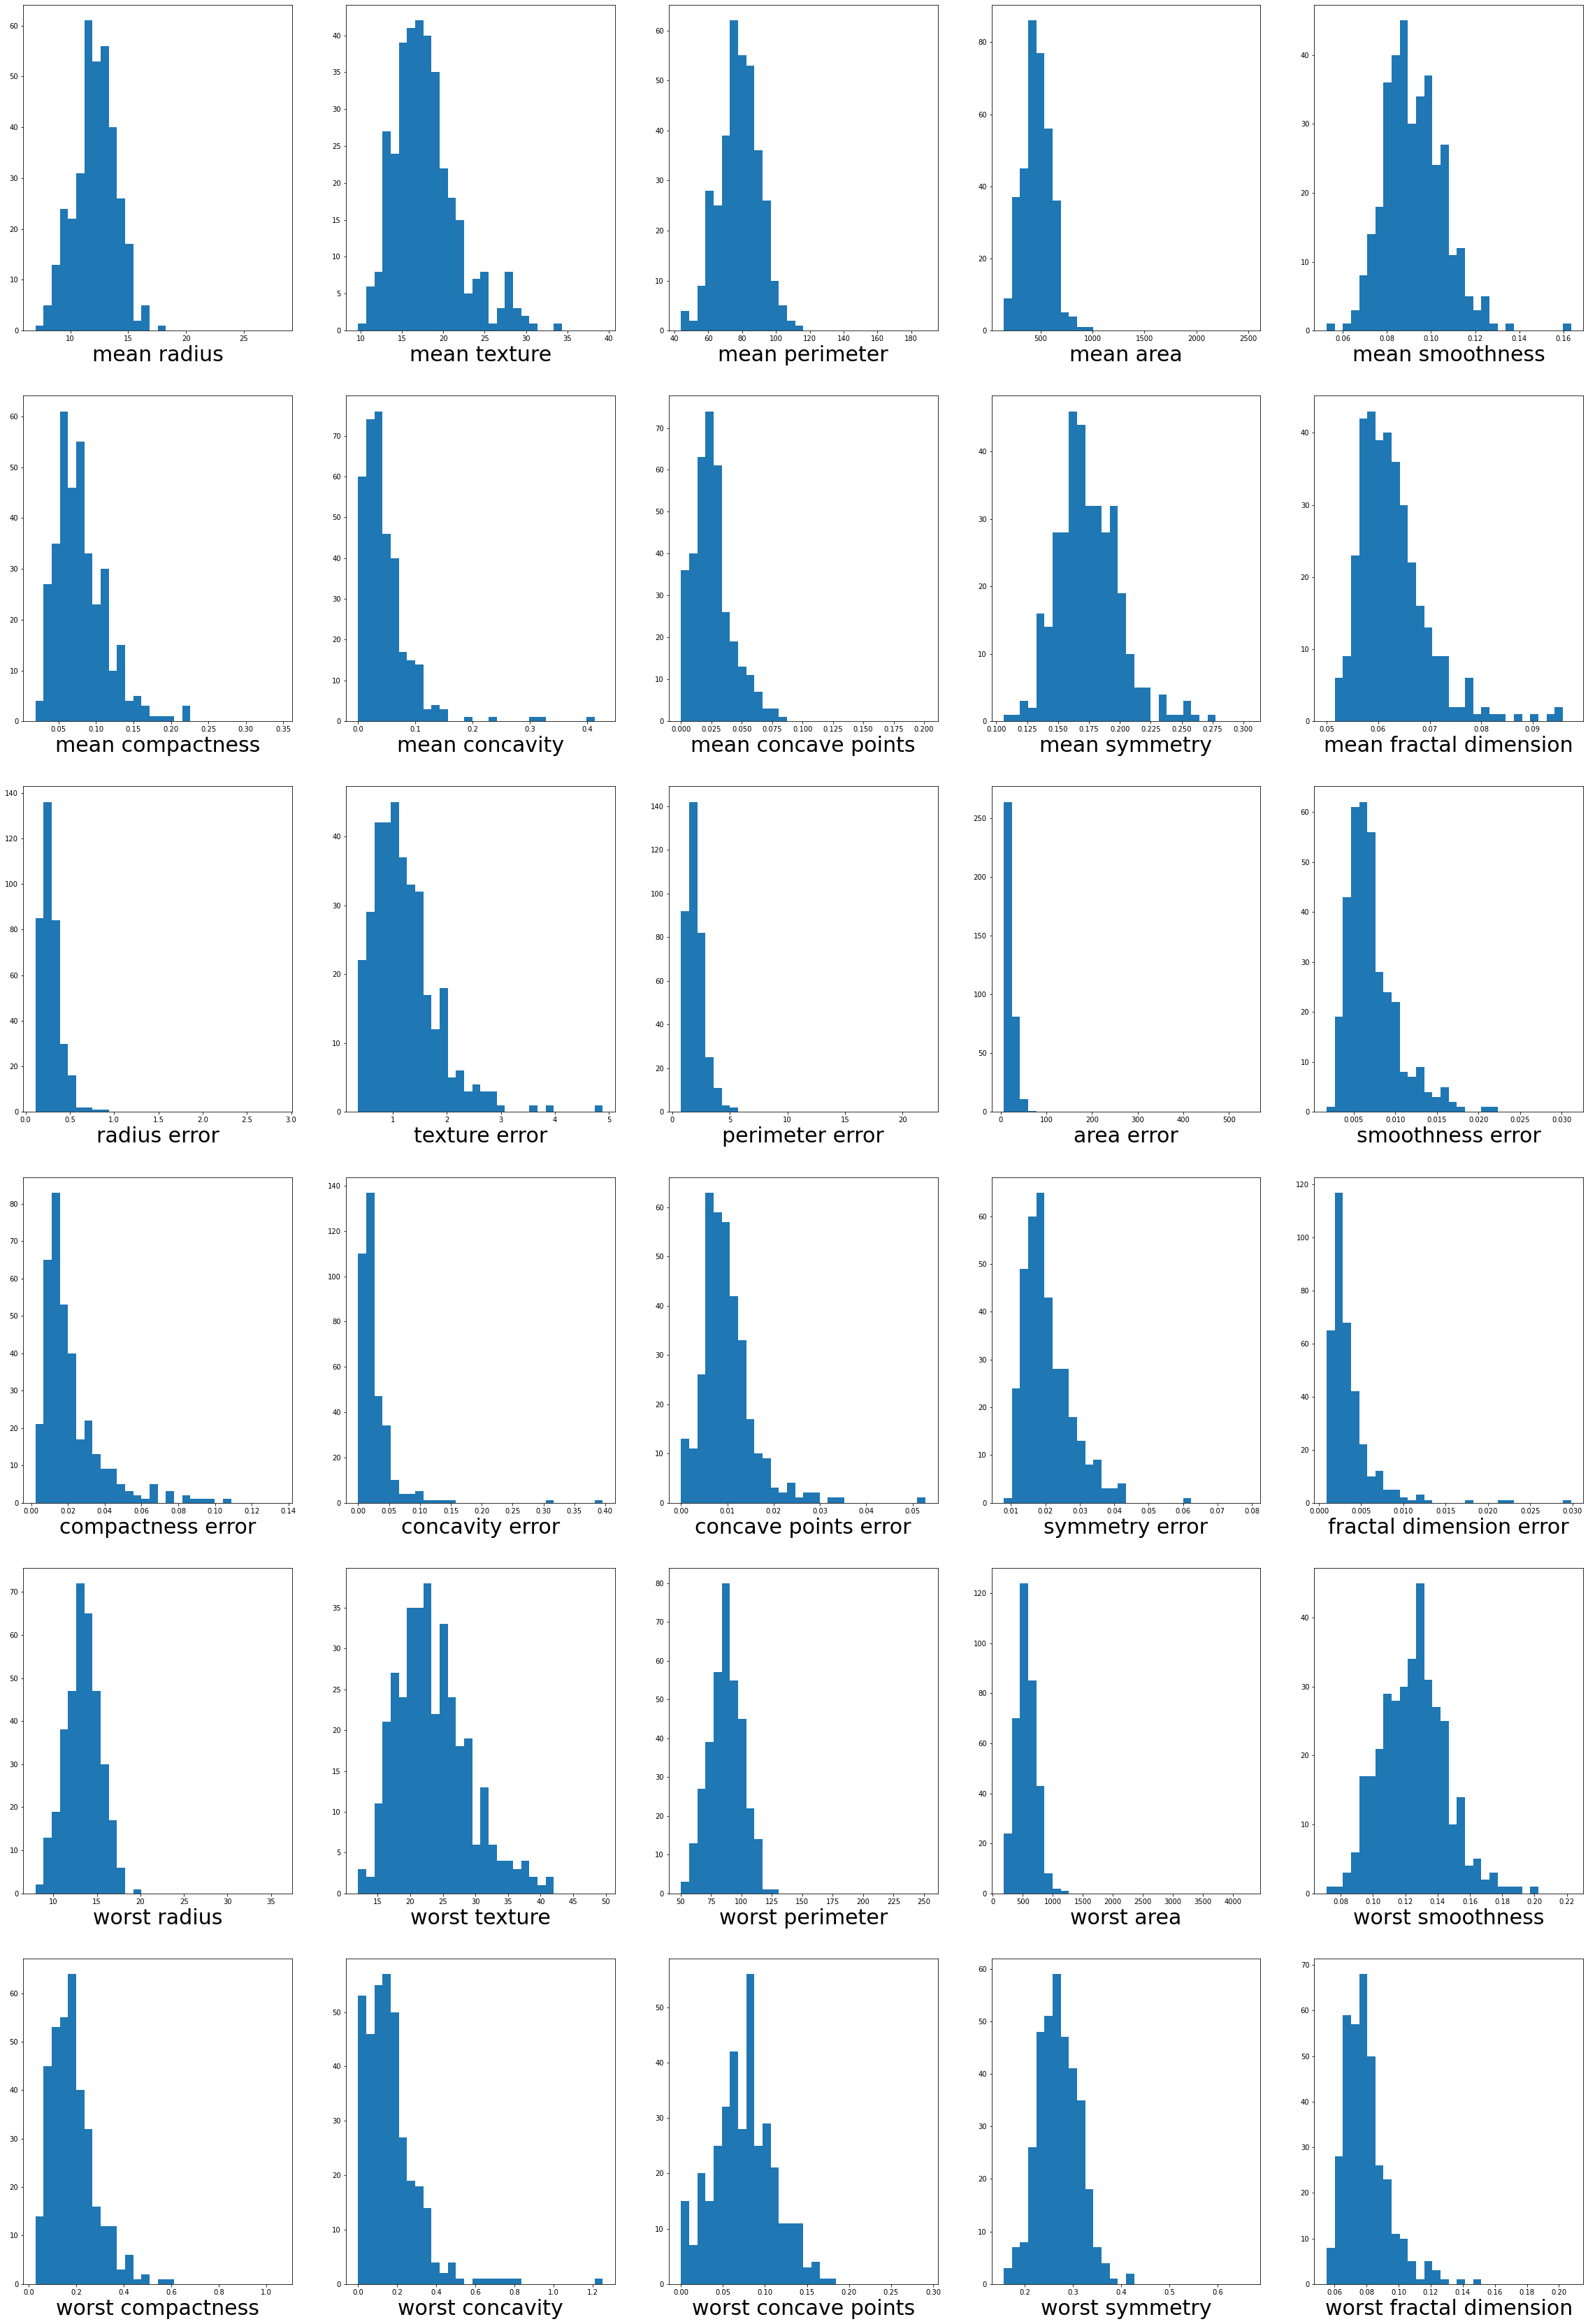

In [3]:
fig = plt.figure(figsize = (40,60))
for i in range(30):
    ax = fig.add_subplot(6,5, i + 1)
    ax.hist(breast.data[:,i], bins = 30, weights = breast.target)
    ax.set_xlabel(breast.feature_names[i], fontsize = 30)

## **Cancer data 특성별 histogram**

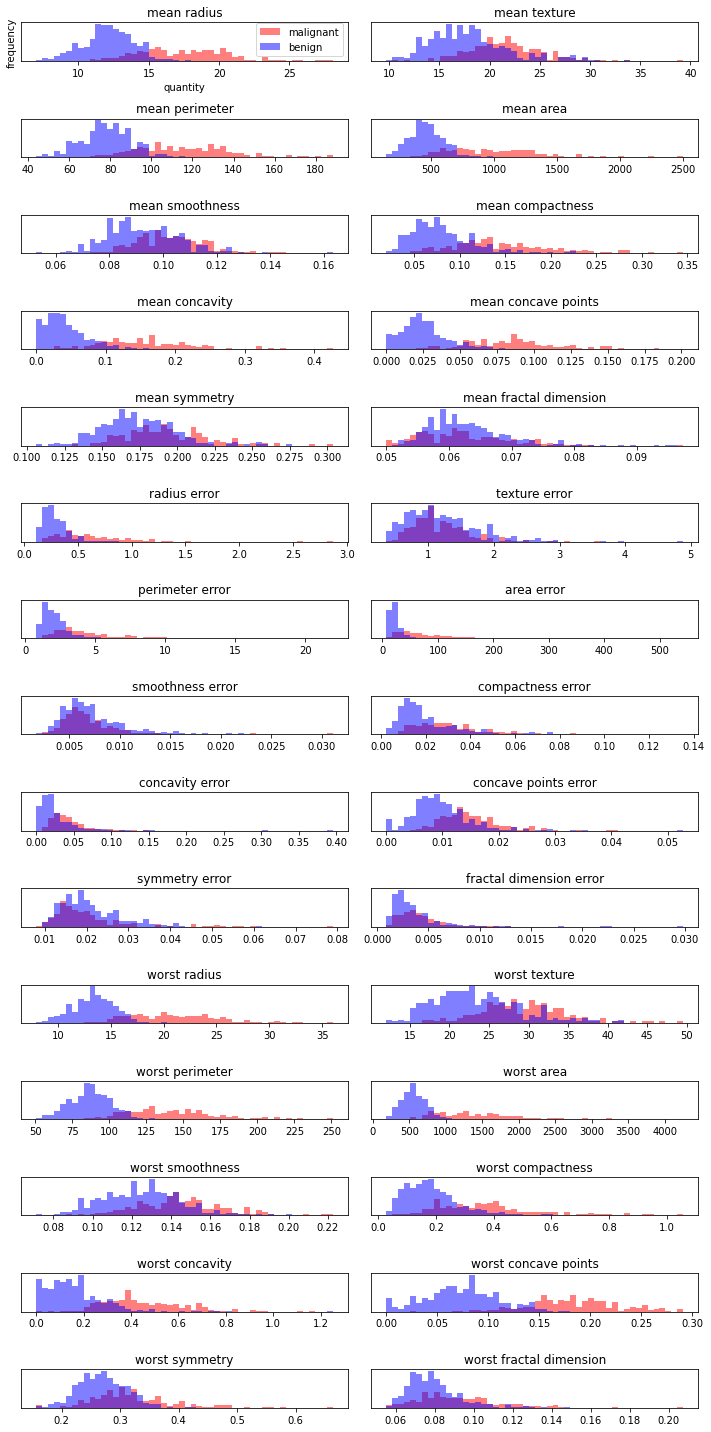

In [4]:
fig, axes = plt.subplots(15, 2, figsize = (10,20))
malignant = breast.data[breast.target == 0]
benign = breast.data[breast.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(breast.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = 'red', alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, color = 'blue', alpha = 0.5)
    ax[i].set_title(breast.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('quantity')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc = 'best')
fig.tight_layout()

# =====================================  
## **PCA**
- StandardScaler를 사용해 각 특성의 분산이 1이 되도록 정규화

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer = PCA()
pca_cancer.fit(X_scaled)

# data trasformation
X_pca_cancer = pca_cancer.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer.shape)))

original data: (569, 30)
deducted data: (569, 30)


In [10]:
var1 = np.cumsum(np.round(pca_cancer.explained_variance_ratio_, decimals=4)*100)

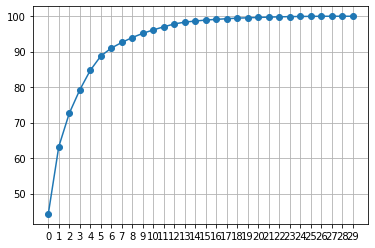

In [11]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(var1, marker='o')
plt.grid()

No handles with labels found to put in legend.


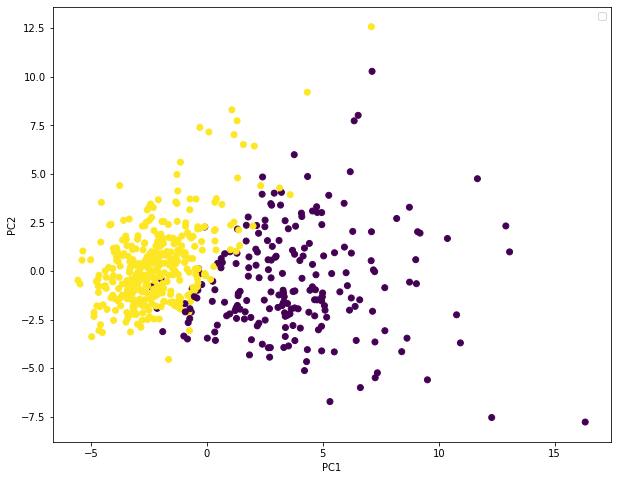

In [12]:
# 클래스 구분하여 처음 2개의 주성분에 나타냄

plt.figure(figsize = (10,8))
plt.scatter(X_pca_cancer[:,0], X_pca_cancer[:,1], c = cancer.target)
plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

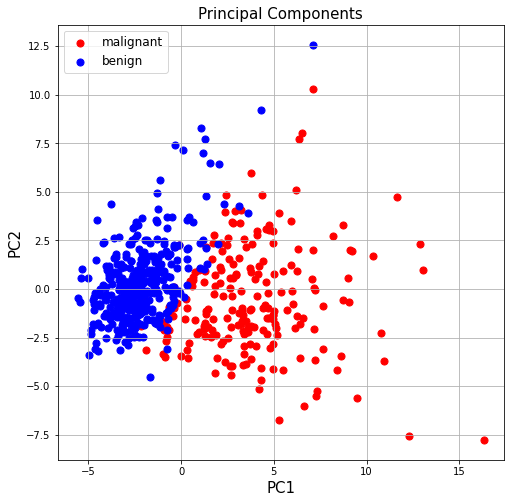

In [13]:
fig, axes = plt.subplots(1,1,figsize=(8,8))

targets = [0,1]
colors = ['r','b']

for target, color in zip(targets, colors):
    indicesToKeep = cancer.target == target
    axes.scatter(X_pca_cancer[indicesToKeep,0],X_pca_cancer[indicesToKeep,1],
                 c = color, s = 50)

axes.set_xlabel('PC1', size = 15)
axes.set_ylabel('PC2', size = 15)
axes.set_title("Principal Components", size = 15 )
axes.legend(['malignant','benign'], fontsize = 12, loc=2)
axes.grid()


## **scree plot**

In [14]:
pca_cancer.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

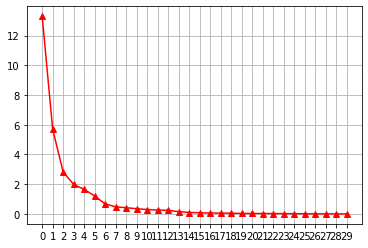

In [15]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(pca_cancer.explained_variance_,marker='^',c='red')
plt.grid()

In [16]:
var1 = np.cumsum(np.round(pca_cancer.explained_variance_ratio_, decimals=4)*100)

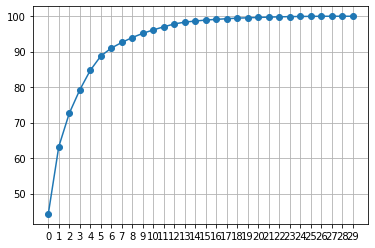

In [17]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(var1, marker='o')
plt.grid()

## **7개 주성분 선택**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer7 = PCA(n_components=7)
pca_cancer7.fit(X_scaled)

# data trasformation
X_pca_cancer7 = pca_cancer7.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer7.shape)))

original data: (569, 30)
deducted data: (569, 7)


## **Logistic Regression (PCA 전)**


In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [24]:
# 1. 데이터 불러오기

cancer = datasets.load_breast_cancer()

# 2. 데이터 분할 - 이항분류

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# 3. modelling

logreg = LogisticRegression().fit(X_train, y_train)
logreg

# 4. 결과 비교

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 5. parameter tuning

logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
logreg001

logreg1000 = LogisticRegression(C = 100).fit(X_train, y_train)
logreg1000

훈련 세트 점수: 0.945
테스트 세트 점수: 0.930


LogisticRegression(C=100)

## **PCA 후**